<h1 align="center">House Price Regression

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import morethemes as mt
import pandas as pd
mt.set_theme("ft")
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
data = pd.read_csv("house_price_regression_dataset.csv")
print(data.shape)
data.head()

(1000, 8)


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
duplicates = data[data.duplicated()]# Check for duplicates in the 'data' DataFrame
data = data.drop_duplicates()# Remove duplicates from data
data.shape

(1000, 8)

In [6]:
data = data.select_dtypes(exclude=['object'])
data.drop(columns=data.select_dtypes(include=['object']).columns, inplace=True)

In [7]:
data.shape

(1000, 8)

In [8]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


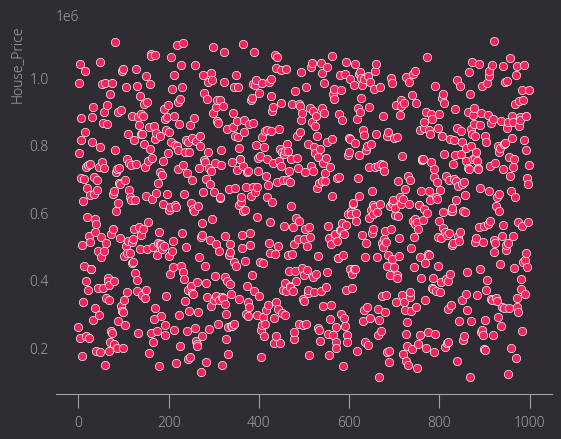

In [9]:
sns.scatterplot(data["House_Price"])
plt.show()

In [10]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [11]:
corr = data.corr()
corr

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


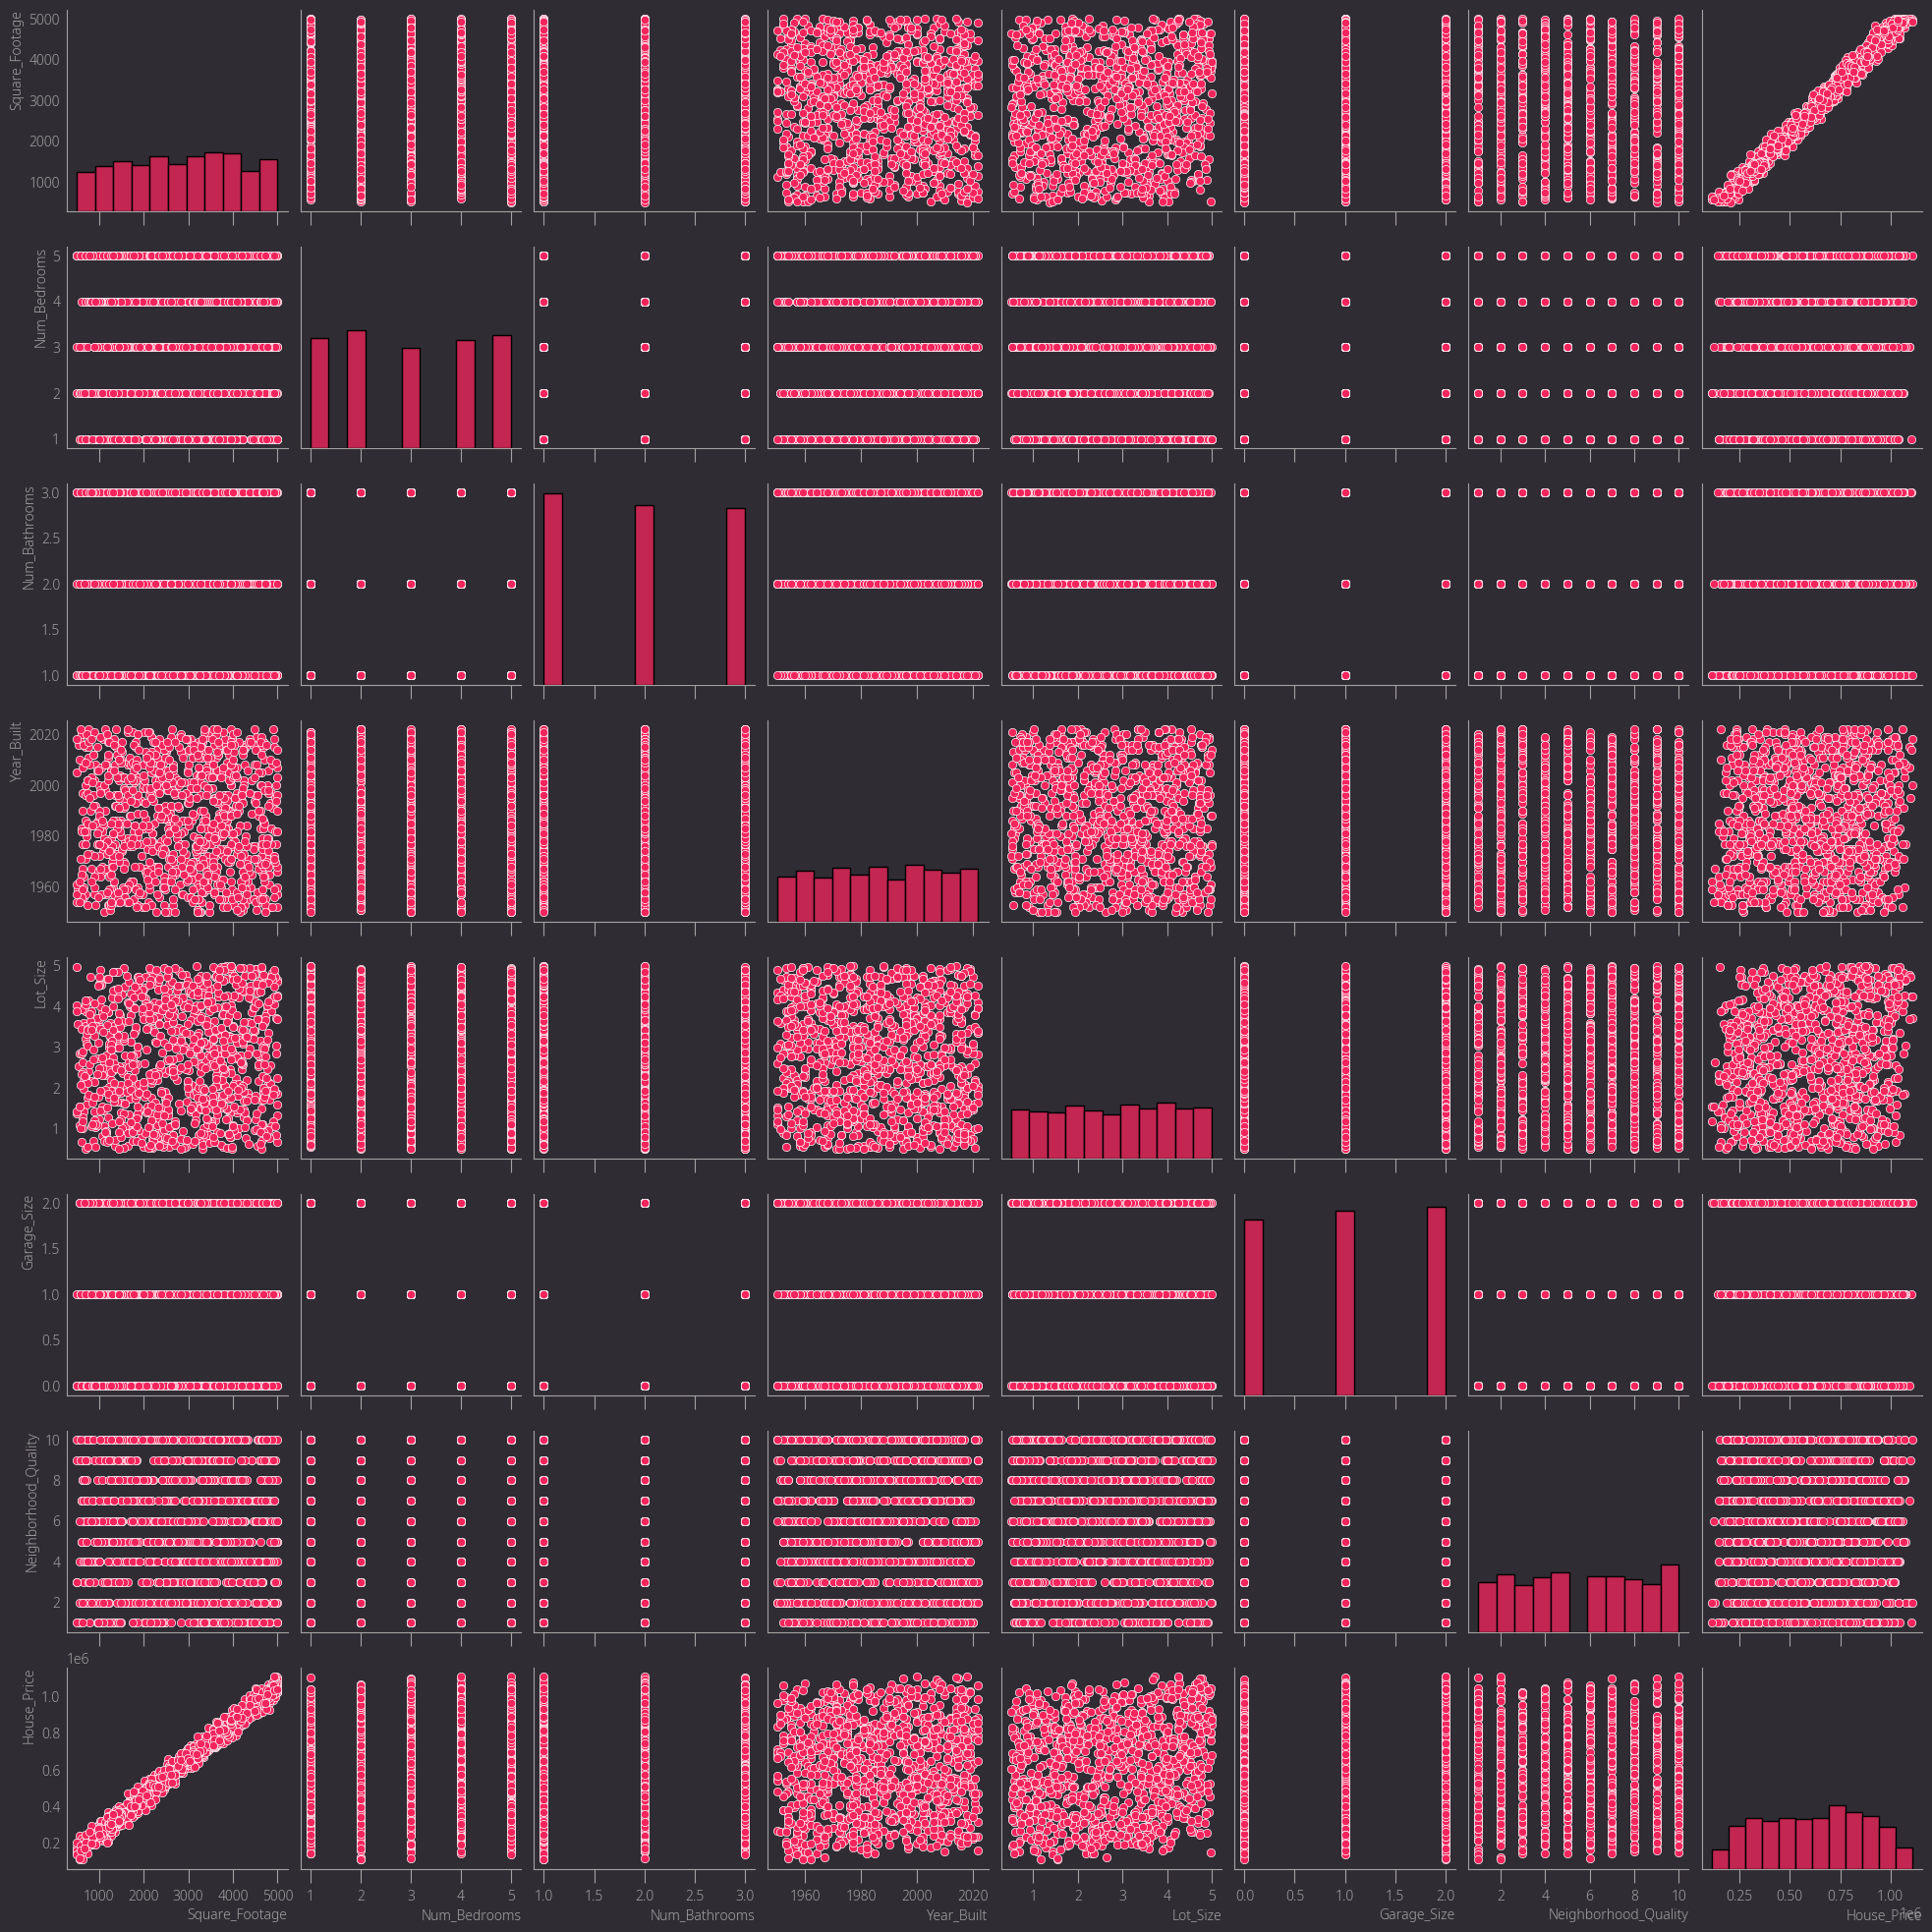

In [12]:
sns.pairplot(data)
plt.show()

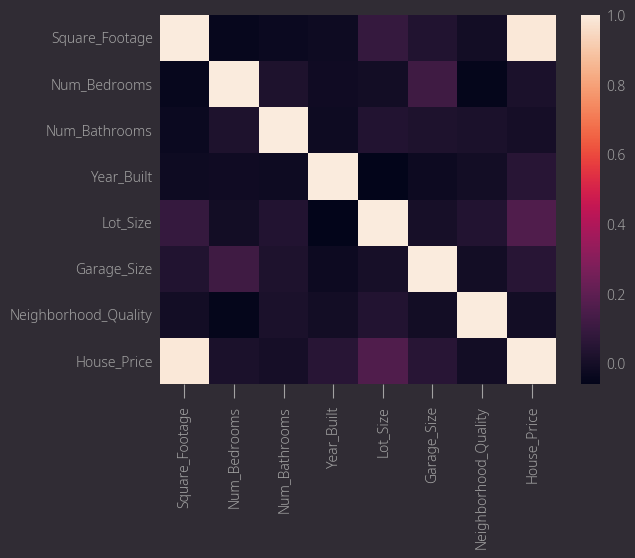

In [13]:
sns.heatmap(corr)
plt.show()

In [14]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [15]:
X = data.drop(columns=["House_Price"])
y = data["House_Price"]

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Exemple : X = features, y = target
model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()

In [29]:
print(lm.intercept_)

-1990765.229085247


In [30]:
print(lm.coef_)

[  199.7508094  10332.64327414  8738.51267604   982.32554297
 15048.60418605  5161.14403584    72.15088668]


In [31]:
pred = lm.predict(X_test)

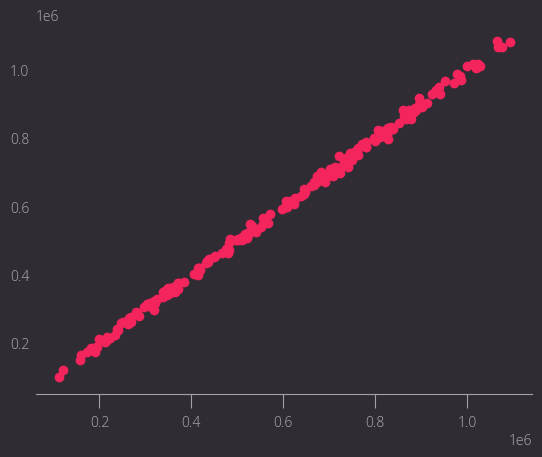

In [32]:
plt.scatter(y_test,pred)
plt.show()

In [33]:

# Importance des features
importances = model.feature_importances_
feature_scores = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_scores.head(10))


Square_Footage          0.985732
Year_Built              0.005555
Lot_Size                0.005436
Num_Bedrooms            0.001642
Neighborhood_Quality    0.000704
Num_Bathrooms           0.000488
Garage_Size             0.000443
dtype: float64


In [35]:
from sklearn import metrics

In [37]:
mse = metrics.mean_absolute_error(y_test,pred)
mse

7774.263017959111

In [38]:
rmse = metrics.root_mean_squared_error(y_test,pred)
rmse

9631.339679052127

In [39]:
rmse = metrics.mean_squared_error(y_test,pred)
rmse

92762704.01328392